<a href="https://colab.research.google.com/github/Amar-AIcloud/Tensorflow-Object-detection/blob/main/TFOD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object Detection 

In [2]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


*Coloning git*

In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58192, done.
remote: Counting objects: 100% (524/524), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 58192 (delta 294), reused 497 (delta 281), pack-reused 57668
Receiving objects: 100% (58192/58192), 573.11 MiB | 25.66 MiB/s, done.
Resolving deltas: 100% (40292/40292), done.


In [3]:
pwd

'/content'

In [4]:
cd /content/models/research


/content/models/research


In [5]:
pwd


'/content/models/research'

In [6]:
!protoc object_detection/protos/*.proto --python_out=.

In [7]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [8]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [9]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [10]:
!make # for compilation purpose


python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [11]:
cp -r pycocotools /content/models/research

Install Object Detection API

In [12]:
cd ..


/content/models/research/cocoapi


In [13]:
cd ..

/content/models/research


In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 22.6MB/s 
     |████████████████████████████████| 358kB 37.9MB/s 
     |████████████████████████████████| 1.6MB 24.0MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 153kB 30.2MB/s 
     |████████████████████████████████| 2.3MB 34.0MB/s 
     |████████████████████████████████| 829kB 33.3MB/s 
     |████████████████████████████████| 38.2MB 87kB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 1.2MB 25.9MB/s 
     |████████████████████████████████| 174kB 38.4MB/s 
     |████████████████████████████████| 686kB 33.3MB/s 
     |████████████████████████████████| 645kB 28.2MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1652954 sha256=e62f3e45b21d493c7a8459b3f3

**LabelImg(Preparing the Dataset**

In [ ]:
!pip install labelImg

     |████████████████████████████████| 256kB 6.2MB/s 
     |████████████████████████████████| 8.3MB 8.8MB/s 
     |████████████████████████████████| 317kB 41.4MB/s 
     |████████████████████████████████| 59.9MB 66kB/s 
  Created wheel for labelImg: filename=labelImg-1.8.5-py2.py3-none-any.whl size=258440 sha256=4867a7b9a4318ffcdb35331f82097dcf7eaf8269b6efca44782fc62db083645b
  Stored in directory: /root/.cache/pip/wheels/53/b2/f4/02f21e727c596a7f97b29fdadbff6cbb209b135548e64a5a64
Successfully built labelImg


Labeling the images

In [ ]:
pwd

'/content/models/research'

In [ ]:
cd ..

/content/models


In [ ]:
cd ..

/content


In [ ]:
!pip install labelImg

Added Train and test data(going inside pretrained model)

In [16]:
cd /content/training/pretrained_models

/content/training/pretrained_models


In [17]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-06-10 05:22:42--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   114MB/s    in 3.2s    

2021-06-10 05:22:46 (114 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [18]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


*Adding Label map and Xml to record File*

In [19]:
cd /content/training

/content/training


In [22]:
pwd

'/content/training'

In [23]:
# Create train data:
!python generate_tfrecord.py -x /content/training/images/train -l /content/training/Annotations/label_map.pbtxt -o /content/training/Annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training/images/test -l /content/training/Annotations/label_map.pbtxt -o /content/training/Annotations/test.record

Successfully created the TFRecord file: /content/training/Annotations/train.record
Successfully created the TFRecord file: /content/training/Annotations/test.record


Adding my_ssd folder&Pipeline_config to models in Training

In [24]:
pwd


'/content/training'

In [33]:
!python model_main_tf2.py --model_dir=/content/training/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training/models/my_ssd_resnet101_v1_fpn/pipeline.config

2021-06-10 06:47:15.295848: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0610 06:47:15.297121 140440911271808 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
W0610 06:47:15.297442 140440911271808 mirrored_strategy.py:379] Collective ops is not configured at program startup. Some performance features may not be enabled.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0610 06:47:15.299927 140440911271808 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0610 06:47:15.305720 140440911271808 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 06:47:15.305991 140440911271808 config_util.py:552] Maybe overwriting us

In [28]:
cd ..

/content


In [29]:
cd /content/training

/content/training


In [30]:
!python model_main_tf2.py --model_dir=/content/training/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training/models/my_ssd_resnet101_v1_fpn/pipeline.config --checkpoint_dir=/content/training/models/my_ssd_resnet101_v1_fpn

Traceback (most recent call last):
  File "model_main_tf2.py", line 115, in <module>
    tf.compat.v1.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "model_main_tf2.py", line 90, in main
    wait_interval=300, timeout=FLAGS.eval_timeout)
  File "/usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py", line 1129, in eval_continuously
    checkpoint_dir, timeout=timeout, min_interval_secs=wait_interval):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/checkpoint_utils.py", line 199, in checkpoints_iterator
    checkpoint_dir, checkpoint_path, timeout=timeout)
  File "/usr/local/lib/python3.7/dist-

In [34]:
!python \exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training/models/my_ssd_resnet101_v1_fpn --output_directory /content/training/exported-models/my_model

2021-06-10 06:51:30.092855: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0610 06:51:30.393038 139833739417472 deprecation.py:601] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0610 06:51:58.493229 139833739417472 save_impl.py:77] Skipping full serialization of Ker

Interfercing Trained Models

Loading model...Done! Took 24.640209674835205 seconds
Running inference for /content/training/images/train/y3238.jpg... Done


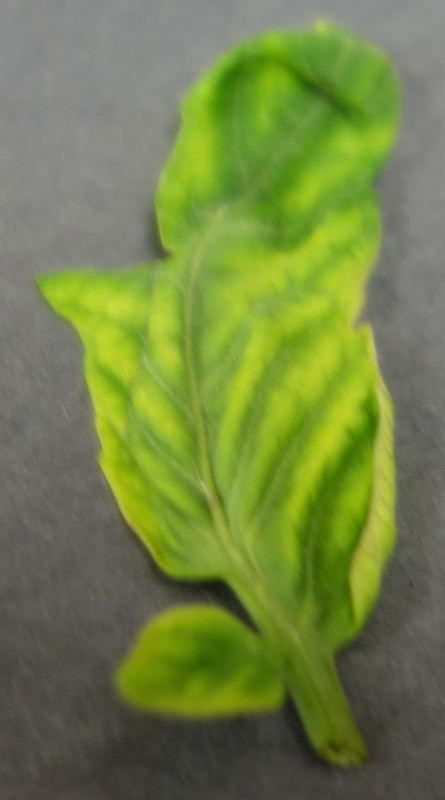

In [35]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training/images/train/y3238.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training/Annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [41]:
!tensorboard --logdir=/content/training/models/my_ssd_resnet101_v1_fpn